<p hidden>$
\newcommand{\phm}{\phantom{-}}
\newcommand{\vb}{\underline{\mathbf{b}}}
\newcommand{\vf}{\underline{\mathbf{f}}}
\newcommand{\vk}{\underline{\mathbf{k}}}
\newcommand{\vx}{\underline{\mathbf{x}}}
\newcommand{\vy}{\underline{\mathbf{y}}}
\newcommand{\deriv}[3][]{\frac{\mathrm{d}^{#1}#2}{\mathrm{d}#3^{#1}}}
\newcommand{\partderiv}[3][]{\frac{\partial^{#1}#2}{\partial#3^{#1}}}
\newcommand{\intd}{\,\mathrm{d}}
\newcommand{\rmd}{\mathrm{d}}
\DeclareMathOperator{\Uniform}{Uniform}
\DeclareMathOperator{\Poisson}{Poisson}
\DeclareMathOperator{\Normal}{Normal}
\DeclareMathOperator{\Exponential}{Exponential}
\DeclareMathOperator{\GammaDist}{Gamma}
\DeclareMathOperator{\Prob}{P}
\DeclareMathOperator{\Exp}{E}
\DeclareMathOperator{\Var}{Var}
$</p>

# Lab 8: Numerical Integration

### Topics

- **Mathematics:** Trapezium and Simpson's rules for numerical integration; estimation and behaviour of errors
- **Python:** writing code to solve integration problems; using format strings.

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
#np.set_printoptions(suppress=True)
%matplotlib notebook

np.set_printoptions(edgeitems=5, linewidth=100000, precision=6)

## Preparation

Study the theory and examples in your lecture notes.  See also Chapra and Canale's chapter about integration formulas.

You have been provided with code to evaluate the one step of Trapezium and Simpson's rules. Note that Simpson's rule requires three points in order to fit the quadratic interpolant over the interval $[a, b]$, but we still consider this to be one step overall.

Read the functions below to see how the function should be used.

In [17]:
def one_step_trap(f, a, b):
    """Use the simple one-step Trapezium rule to integrate f(x) over the interval [a, b].
    Args:
        f (func): function to integrate
        a (float): left hand side of the interval
        b (float): right hand side of the interval
    Returns:
        r (float): simple one-step Trapezium rule approximation to the integral
    """
    
    h = (b - a)
    
    return h / 2 * (f(a) + f(b))


def one_step_simp(f, a, b):
    """Use the simple one-step Simpson's rule to integrate f(x) over the interval [a, b].
    Args:
        f (func): function to integrate
        a (float): left hand side of the interval
        b (float): right hand side of the interval
    Returns:
        r (float): simple one-step Simpson's rule approximation to the integral
    """
    
    h = (b - a)
    
    return h / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))


help(one_step_trap)
help(one_step_simp)

Help on function one_step_trap in module __main__:

one_step_trap(f, a, b)
    Use the simple one-step Trapezium rule to integrate f(x) over the interval [a, b].
    Args:
        f (func): function to integrate
        a (float): left hand side of the interval
        b (float): right hand side of the interval
    Returns:
        r (float): simple one-step Trapezium rule approximation to the integral

Help on function one_step_simp in module __main__:

one_step_simp(f, a, b)
    Use the simple one-step Simpson's rule to integrate f(x) over the interval [a, b].
    Args:
        f (func): function to integrate
        a (float): left hand side of the interval
        b (float): right hand side of the interval
    Returns:
        r (float): simple one-step Simpson's rule approximation to the integral



## Review
Python functions can take other functions as inputs. We can pass any valid function $f(x)$ to the methods above which means that we don't have to write custom code for each function that we want to integrate.

You can define functions using `def func(t, y):` or `lambda t, y: ...` if the function can be defined easily.

## Errors

The first part of the lab looks at the accuracy of the Trapezium Rule and Simpson's Rule. The key questions are:
- When do these rules give an exact answer?
- How do the errors behave as we partition the region of integration into smaller intervals?
- How can we estimate the errors in practice?

## Simple one-step integration on the interval $[0, 1]$

To study accuracy of the Trapezium Rule and Simpson's Rule, we need some integrals whose exact value we already know.

We shall use the following four integrals.

$$
  I_1=\int\limits^1_0 x   \intd x \qquad\qquad
  I_2=\int\limits^1_0 x^2 \intd x \qquad\qquad
  I_3=\int\limits^1_0 x^3 \intd x \qquad\qquad
  I_4=\int\limits^1_0 x^4 \intd x
$$

#### Tasks

1. Find the exact values of these integrals analytically. **Hint:** You should do this using pen and paper only.
2. Use `one_step_trap` and `one_step_simp` to approximate $I_1$ over the interval $[0, 1]$.
3. What is the difference between the approximations and the exact value of the integral? Is this what you expected?

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>
  
  Why does <code>one_step_simp</code> give the exact value for $I_2$ and $I_3$ while <code>one_step_trap</code> does not? Explain your results from the simple one-step Trapezium and Simpson's rules by using the theoretical error formulas for each rule from the lectures.
</div>

In [18]:
# I_1 = 1/2, I_2 = 1/3, I_3 = 1/4, I_4 = 1/5
f1 = lambda x: x
f2 = lambda x: x**2
f3 = lambda x: x**3
f4 = lambda x: x**4
function_list = [f1, f2, f3, f4]
for i in range(4):
    print(f"I{i+1}")
    simp_approx = one_step_simp(function_list[i], 0, 1)
    trap_approx = one_step_trap(function_list[i], 0, 1)
    print(f"Simpsons Rule One Step Approximation: {simp_approx}")
    print(f"Trapezium Rule One Step Approximation: {trap_approx}")
# One step simp gives an exact value as it is a quartic method, and the fourth derivative of the functions that we are
# approximating is zero, so the error is zero. One step trap is a second order method, so for functions where the second 
# derivative is not zero, there will be an error.

I1
Simpsons Rule One Step Approximation: 0.5
Trapezium Rule One Step Approximation: 0.5
I2
Simpsons Rule One Step Approximation: 0.3333333333333333
Trapezium Rule One Step Approximation: 0.5
I3
Simpsons Rule One Step Approximation: 0.25
Trapezium Rule One Step Approximation: 0.5
I4
Simpsons Rule One Step Approximation: 0.20833333333333331
Trapezium Rule One Step Approximation: 0.5


## Composite rules

To improve the accuracy of our numerical integration method, we would typically partition the interval $[a, b]$ into sub-intervals where we use the area approximation on each sub-interval. This is called a *composite rule* and is what is meant when we talk about the Trapezium rule and Simpson's rule in general.

Next you will write functions for the composite Trapezium and Simpson's rules and explore their errors in more detail.

#### Tasks

1. Write a function `trap` that evaluates the composite Trapezium rule with the inputs `trap(f, a, b, n)` where $n$ is the number of steps or sub-intervals in $[a, b]$. Note that the length of each sub-interval is $h = (b - a) \frac{1}{n}$. You can modify or use `one_step_trap` to help write `trap`.
2. Set $n = 1$ and verify that `trap` computes the same results as `one_step_trap` for the above integrals $I_1$ to $I_4$.
3. Write a function `simp` that evaluates composite Simpson's rule in the same way.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>
  
  Now try increasing $n > 1$ and verify that the <code>trap</code> and <code>simp</code> behave as expected.
</div>

In [19]:
def trap(f, a, b, n):
    h = (b-a)/n
    i = a
    sum_value = 0
    i = a
    for _ in range(n):
        sum_value += one_step_trap(f, i, i+h)
        i += h
        
    return sum_value

def simp(f, a, b, n):
    h = (b-a)/n
    i = a
    sum_value = 0
    i = a
    for _ in range(n):
        sum_value += one_step_simp(f, i, i+h)
        i += h
        
    return sum_value

n = 100000
for i in range(4):
    print(f"I{i+1}")
    print(f"n={n}")
    simp_approx = simp(function_list[i], 0, 1, n)
    trap_approx = trap(function_list[i], 0, 1, n)
    print(f"Simpsons Rule One Step Approximation: {simp_approx}")
    print(f"Trapezium Rule One Step Approximation: {trap_approx}")

I1
n=100000
Simpsons Rule One Step Approximation: 0.49999999999808226
Trapezium Rule One Step Approximation: 0.49999999999808226
I2
n=100000
Simpsons Rule One Step Approximation: 0.333333333331417
Trapezium Rule One Step Approximation: 0.333333333348083
I3
n=100000
Simpsons Rule One Step Approximation: 0.24999999999808226
Trapezium Rule One Step Approximation: 0.25000000002308514
I4
n=100000
Simpsons Rule One Step Approximation: 0.1999999999980826
Trapezium Rule One Step Approximation: 0.20000000003141674


## Errors

We want to determine the accuracy of the composite Trapezium and Simpson's rules for varying $n > 0$.

We will do this by compare approximations to the exact value of the integral $I_4$.

Write down the step size $h$, the approximations $T_n$ and $S_n$, and the errors $E_T$ and $E_S$ in the table below for each $n$ as you double your number of steps starting from $n = 1$ until there is no change in the first four significant digits of the approximations. You can either write the table down by hand or you can use a numpy array to store the values by indexing.

<br>
<center>
<table width="100%">
    <tbody>
        <tr>
            <td style="text-align: center; width: 80px">$n$</td>
            <td style="text-align: center; width: 80px">$h$</td>
            <td style="text-align: center">$T_n$</td>
            <td style="text-align: center">$E_T$</td>
            <td style="text-align: center">$S_n$</td>
            <td style="text-align: center">$E_S$</td>
        </tr>
        <tr>
            <td style="text-align: center">$1$</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$2$</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$4$</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$8$</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$\vdots$</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td>$ $</td>
            <td></td><td></td><td></td><td></td><td></td>
        </tr>
    </tbody>
</table>
</center>

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>
  
  Explain your results. How do the errors $E_T$ and $E_S$ change as $n$ is doubled?
    
  Use <code>ax.loglog</code> to plot each error against the number of steps and describe the relationship.
    
  What can you say about the rate of convergence of each method?
</div>


[[  1.         1.         0.5        0.3        0.208333   0.008333]
 [  2.         0.5        0.28125    0.08125    0.200521   0.000521]
 [  4.         0.25       0.220703   0.020703   0.200033   0.000033]
 [  8.         0.125      0.2052     0.0052     0.200002   0.000002]
 [ 16.         0.0625     0.201302   0.001302   0.2        0.      ]
 [ 32.         0.03125    0.200325   0.000325   0.2        0.      ]
 [ 64.         0.015625   0.200081   0.000081   0.2        0.      ]
 [128.         0.007812   0.20002    0.00002    0.2        0.      ]
 [256.         0.003906   0.200005   0.000005   0.2        0.      ]
 [512.         0.001953   0.200001   0.000001   0.2        0.      ]]


<IPython.core.display.Javascript object>


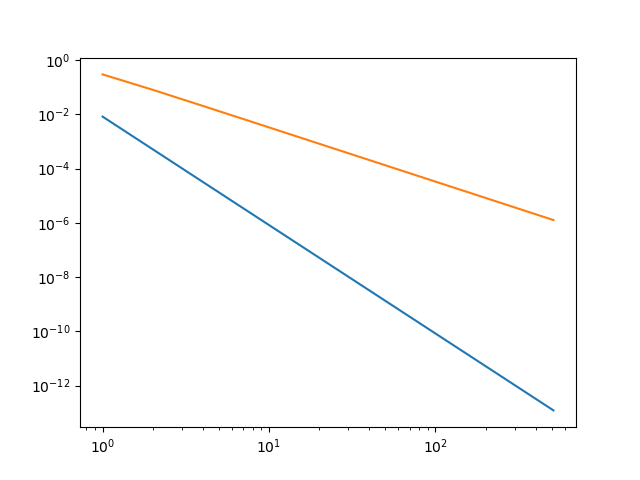

In [38]:
f = lambda x: x**4
I_4 = 1/5
n = 10
a = 0
b = 1
table = np.zeros((n, 6))
for i in range(n):
    N = 2**i 
    h = (b-a)/N
    T_n = trap(f, a, b, N)
    E_T = abs(I_4 - T_n)
    S_n = simp(f, a, b, N)
    E_S = abs(I_4 - S_n)
    table[i, :] = np.array([N, h, T_n, E_T, S_n, E_S])
    
print(table)
number_of_steps = table[:, 0]
trap_errors = table[:, 3]
simp_errors = table[:, 5]
fig, ax = plt.subplots()
ax.loglog(number_of_steps, simp_errors)
ax.loglog(number_of_steps, trap_errors)

## Estimating the error

If we don't know the exact solution, we can estimate the error from two different approximations using the estimation method given in the lectures.

For the Trapezium rule the estimate is defined:

$$
      \text{error in } T_{2n} \approx \frac{\vert T_{n}-T_{2n}\vert}{3}.
$$

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 4</h3>

  Use the data from your table above to estimate $E_T$ for each $n > 1$. How good is the estimate?
</div>

You might want to use something like the table below.

<br>
<center>
<table width="80%">
    <tbody>
        <tr>
            <td style="text-align: center; width: 80px">$n$</td>
            <td style="text-align: center; width: 80px">$h$</td>
            <td style="text-align: center">$T_n$</td>
            <td style="text-align: center">$E_T$</td>
            <td style="text-align: center">${\sim}E_T$</td>
        </tr>
        <tr>
            <td style="text-align: center">$1$</td>
            <td></td><td></td><td></td><td style="text-align: center;">--------</td>
        </tr>
        <tr>
            <td style="text-align: center;">$2$</td>
            <td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$4$</td>
            <td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$8$</td>
            <td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td style="text-align: center;">$\vdots$</td>
            <td></td><td></td><td></td><td></td>
        </tr>
        <tr>
            <td>$ $</td>
            <td></td><td></td><td></td><td></td>
        </tr>
    </tbody>
</table>
</center>


In [40]:
f = lambda x: x**4
I_4 = 1/5
n = 10
a = 0
b = 1
table = np.zeros((n, 6))
for i in range(n):
    N = 2**i 
    h = (b-a)/N
    T_n = trap(f, a, b, N)
    T_2n = trap(f, a, b, 2*N)
    E_T = abs(I_4 - T_n)
    E_T_approx = abs(T_n-T_2n)/3
    difference = abs(E_T - E_T_approx)
    

    table[i, :] = np.array([N, h, T_n, E_T, E_T_approx, difference])
    
print(table)
    

[[  1.         1.         0.5        0.3        0.072917   0.227083]
 [  2.         0.5        0.28125    0.08125    0.020182   0.061068]
 [  4.         0.25       0.220703   0.020703   0.005168   0.015535]
 [  8.         0.125      0.2052     0.0052     0.0013     0.003901]
 [ 16.         0.0625     0.201302   0.001302   0.000325   0.000976]
 [ 32.         0.03125    0.200325   0.000325   0.000081   0.000244]
 [ 64.         0.015625   0.200081   0.000081   0.00002    0.000061]
 [128.         0.007812   0.20002    0.00002    0.000005   0.000015]
 [256.         0.003906   0.200005   0.000005   0.000001   0.000004]
 [512.         0.001953   0.200001   0.000001   0.         0.000001]]


## Let's make it tricky

You will now apply the composite trapezium rule to another example.

$$
  I^* = \int\limits_0^1 \sqrt{x} \intd x
$$

#### Tasks

1. Find the exact values of $I^*$ analytically.
2. Use your `simp` function to approximate $I^*$ over the interval $[0, 1]$ to four significant digits of accuracy. 
3. How many times did you have to double $n$ to get this result?

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 5</h3>

  Use the exact errors $E_T$ to compute the rate of convergence. How does it compare to the rate of convergence for $I_4$?
    
  Now do the same using the estimate errors ${\sim}E_T$.

  Explain your results. Is the estimate rate of convergence the same as the exact rate of convergence?
</div>

In [45]:
# I * = 2/3
f = lambda x : np.sqrt(x)
I_4 = 2/3
n = 10
a = 0
b = 1
table = np.zeros((n, 7))
for i in range(n):
    N = 2**i 
    h = (b-a)/N
    T_n = trap(f, a, b, N)
    E_T = abs(I_4 - T_n)
    S_n = simp(f, a, b, N)
    E_S = abs(I_4 - S_n)
    T_2n = trap(f, a, b, 2*N)
    E_T_approx = abs(T_n-T_2n)/3
    table[i, :] = np.array([N, h, T_n, E_T, S_n, E_S, E_T_approx])
    
print(table)
    
# The estim

[[  1.         1.         0.5        0.166667   0.638071   0.028595   0.034518]
 [  2.         0.5        0.603553   0.063113   0.656526   0.01014    0.013243]
 [  4.         0.25       0.643283   0.023384   0.663079   0.003587   0.004949]
 [  8.         0.125      0.65813    0.008536   0.665398   0.001268   0.001817]
 [ 16.         0.0625     0.663581   0.003085   0.666218   0.000448   0.000659]
 [ 32.         0.03125    0.665559   0.001108   0.666508   0.000159   0.000237]
 [ 64.         0.015625   0.666271   0.000396   0.666611   0.000056   0.000085]
 [128.         0.007812   0.666526   0.000141   0.666647   0.00002    0.00003 ]
 [256.         0.003906   0.666617   0.00005    0.66666    0.000007   0.000011]
 [512.         0.001953   0.666649   0.000018   0.666664   0.000002   0.000004]]
